In [1]:
from utility import *
# from matplotlib import animation as anm

ModuleNotFoundError: No module named 'cv2'

In [ ]:
folder_path = '/Users/hunfen/OneDrive/General Files/ゼミー/20210408/2021-04-06/'
fast_generate(folder_path);

In [144]:
grid_path = '/Users/hunfen/OneDrive/General Files/ゼミー/20210401/2021-03-15/Grid Spectroscopy017.3ds'
grid = nano.read_file(grid_path)

In [140]:

Se_vacancy_idx = np.genfromtxt('/Users/hunfen/OneDrive/General Files/ゼミー/20210412/Se_vacancy_pos_nm.txt')
# Se_7T_slice_idx = np.genfromtxt('/Users/hunfen/OneDrive/General Files/ゼミー/20210412/Se_7T.txt')
Cu_7T_slice_idx = np.genfromtxt('/Users/hunfen/OneDrive/General Files/ゼミー/20210412/Cu_7T.txt')
DW_7T_slice_idx = np.genfromtxt('/Users/hunfen/OneDrive/General Files/ゼミー/20210422/Domain_wall.txt')

In [141]:
Grid_09 = nano.read_file('/Users/hunfen/OneDrive/General Files/ゼミー/20210401/2021-03-15/Grid Spectroscopy009.3ds')

In [142]:
bias = np.linspace(50, -34, 401)

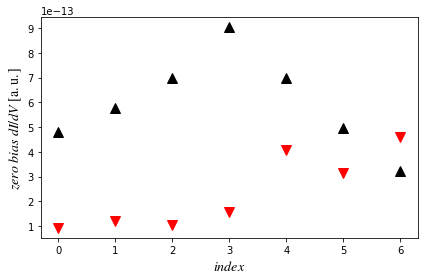

In [249]:
fig, axis = plt.subplots()

for i in range(len(DW_7T_slice_idx)):
    idx = map_pos(DW_7T_slice_idx[i])
    axis.plot(i, (grid.data[idx][1][201] +  grid.data[idx][4][201]) /2, '^', ms = 10, c = 'black')
    axis.plot(i, (Grid_09.data[i][1][201] + Grid_09.data[i][4][201]) /2, 'v', ms = 10, c = 'r')
# axis.legend()

axis.set_xlabel(r'$index$', fontsize = 14)
axis.set_ylabel(r'$zero\ bias\ dI/dV\ \mathrm{[a.u.]}$', fontsize = 14)

fig.tight_layout();
# fig.savefig('/Users/hunfen/OneDrive/General Files/ゼミー/20210422/DW_zbp.png', dpi = 600)

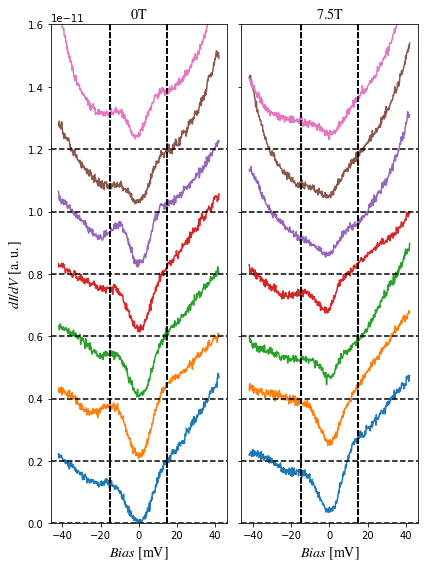

In [148]:
fig, axis = plt.subplots(1, 2, figsize = (6, 8), sharey = True)

for i in range(len(DW_7T_slice_idx)):
    idx = map_pos(DW_7T_slice_idx[i])
    axis[1].plot(bias - 8, (grid.data[idx][1] +  grid.data[idx][4]) /2 + i * 2e-12  , '-')
    axis[1].axhline(y = i * 2e-12, ls = '--', color = 'black')
    axis[1].axvline(x = -15, ls = '--', color = 'black')
    axis[1].axvline(x = 15, ls = '--', color = 'black')


for i in range(len(DW_7T_slice_idx)):
    axis[0].plot(bias - 8, (Grid_09.data[i][1] + Grid_09.data[i][4]) / 2 + i * 2e-12, '-')
    axis[0].axhline(y = i * 2e-12, ls = '--', color = 'black')

    axis[0].axvline(x = -15, ls = '--', color = 'black')
    axis[0].axvline(x = 15, ls = '--', color = 'black')

axis[0].set_xlabel(r'$Bias\ \mathrm{[mV]}$', fontsize = 14)
axis[0].set_ylabel(r'$dI/dV\ \mathrm{[a.u.]}$', fontsize = 14)
axis[0].set_title(r'$0\mathrm{T}$', fontsize = 14)
axis[1].set_xlabel(r'$Bias\ \mathrm{[mV]}$', fontsize = 14)
axis[1].set_title(r'$7.5\mathrm{T}$', fontsize = 14)
axis[0].set_ylim(0, 1.60e-11)
axis[1].set_ylim(0, 1.60e-11)

fig.tight_layout();
# fig.savefig('/Users/hunfen/OneDrive/General Files/ゼミー/20210422/Domain_wall_0&7T.png', dpi = 600)

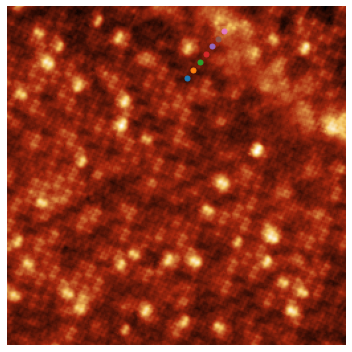

In [154]:
topo_0315_008 = np.genfromtxt('/Users/hunfen/OneDrive/General Files/ゼミー/20210401/2021-03-15/Topography018_correct.txt')
topo = nano.read_file('/Users/hunfen/OneDrive/General Files/ゼミー/20210401/2021-03-15/Topography018.sxm')
fig, axis = plt.subplots(figsize = (5, 5))
axis. imshow(topo_0315_008, extent = topo_extent(topo.header), cmap = gwyddion)

for i in range(len(DW_7T_slice_idx)):
    axis.plot(Grid_09.Parameters[i][2], Grid_09.Parameters[i][3], '.', ms = 10)

axis.axis('off')
fig.tight_layout();

In [ ]:
def length(center = (0, 0), point = (0, 0)):
    return np.sqrt((center[0] - point[0]) ** 2 + (center[1] - point[1]) ** 2)
def vortex_decay(distance, decay):
    return np.exp(- distance / decay)
def vortice_fitting(r, theta_0, Xi):
    return theta_0 + (1 - theta_0) * (1 - np.tanh(np.abs(r) / (np.sqrt(2) * Xi)))

In [ ]:
center = (21.3, 29.7)
cutoff = 10e-9
c_idx = map_pos(center)

len_cut = []
map_cut = []

for idx in range(len(grid.data)):
    distance = length((grid.Parameters[c_idx][2], grid.Parameters[c_idx][3]), (grid.Parameters[idx][2], grid.Parameters[idx][3]))
    if distance <= cutoff:
        len_cut.append(distance)
        map_cut.append((grid.data[idx][1][200] + grid.data[idx][4][200]) / 2)
map_cut = np.array(map_cut)
len_cut = np.array(len_cut)

map_cut = map_cut - map_cut.min()
map_cut = map_cut / map_cut.max()
x = np.unique(len_cut)

popt_1, pcov_1 = curve_fit(vortex_decay, len_cut, map_cut)
print(popt_1)

In [ ]:
fig, axis = plt.subplots(figsize = (5, 5))

# axis.plot(map_cut)
axis.plot(len_cut * 1e9, map_cut, '.', color = 'b')
# axis.plot(x, vortice_fitting(x, popt[0], popt[1]), '-', color = 'r')
axis.plot(x * 1e9, vortex_decay(x, popt_1), '-', color = 'green')
axis.set_xlabel(r'$Distance\ \mathrm{[nm]}$', fontsize = 14)
axis.set_ylabel(r'$dI/dV\ \mathrm{[a.u.]}$', fontsize = 14)
fig.tight_layout();
# fig.savefig('/Users/hunfen/OneDrive/General Files/ゼミー/20210412/vortex_1.png', dpi = 600)

In [ ]:
bias = np.linspace(50, -36, 401)

In [ ]:
Se_spec_total = np.zeros(401)
for i in range(len(Se_vacancy_idx)):
    idx = map_pos(Se_vacancy_idx[i])
    Se_spec_total += ((grid.data[idx][1] + grid.data[idx][4]) / 2)
Se_spec_ave = Se_spec_total / len(Se_vacancy_idx)

In [ ]:
Cu_spec_slice = np.zeros((6, 401))
for i in range(len(Cu_7T_slice_idx)):
    idx = map_pos(Cu_7T_slice_idx[i])
    Cu_spec_slice[i] = ((grid.data[idx][1] + grid.data[idx][4]) / 2)

In [ ]:
fig, axis = plt.subplots(figsize = (3, 5))
for i in range(6):
    axis.plot(bias - 8, Cu_spec_slice[i] + i * 3e-12, '-')
    axis.axhline(y = i * 3e-12, ls = '--', color = 'black')



axis.axvline(x = 4, ls = '--', color = 'black')


axis.set_xlabel(r'$Bias\ \mathrm{[mV]}$', fontsize = 14)
axis.set_ylabel(r'$dI/dV\ \mathrm{[a.u.]}$', fontsize = 14)

fig.tight_layout();
# fig.savefig('/Users/hunfen/OneDrive/General Files/ゼミー/20210412/Cu_defect_7T.png', dpi = 600)

In [ ]:
f_path = '/Users/hunfen/OneDrive/General Files/ゼミー/20210408/2021-04-06/Grid Spectroscopy011.3ds'
grid = nano.read_file(f_path)

bias = np.linspace(50, -50, 401)
spec = np.zeros(401)

for idx in range(len(grid.data)):
    spec += ((grid.data[idx][1] + grid.data[idx][4]) / 2)
spec = spec / len(grid.data)




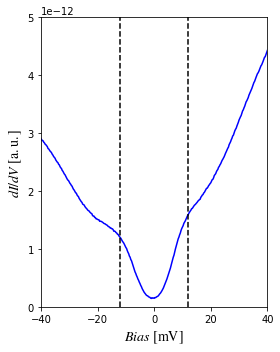

In [400]:
fig, axis = plt.subplots(figsize = (4, 5))

axis.plot(bias - 7, spec, '-', color = 'b')
axis.axvline(x = -12, ls = '--', color = 'black')
axis.axvline(x = 12, ls = '--', color = 'black')
# axis.axhline(y = 0, ls = '--', color = 'black')
axis.set_xlim(-40, 40)
axis.set_ylim(0, 5e-12)

axis.set_xlabel(r'$Bias\ \mathrm{[mV]}$', fontsize = 14)
axis.set_ylabel(r'$dI/dV\ \mathrm{[a.u.]}$', fontsize = 14)

fig.tight_layout();
# fig.savefig('/Users/hunfen/OneDrive/General Files/ゼミー/20210412/gap_april_ave.png', dpi = 600)

In [ ]:
# f = nano.read_file('/Users/hunfen/OneDrive/General Files/ゼミー/未命名文件夹/2021-03-15/Grid Spectroscopy007.3ds')

bias, specs, z = mapping('/Users/hunfen/OneDrive/General Files/ゼミー/未命名文件夹/2021-03-15/Grid Spectroscopy007.3ds', full = False)

In [157]:
length((12.9, 20.7), (7.5, 27.3))

8.527602242131138

In [156]:
def length(center = (0, 0), point = (0, 0)):
    return np.sqrt((center[0] - point[0]) ** 2 + (center[1] - point[1]) ** 2)

In [ ]:
center = (9, 5)
Range = 5

cut = np.zeros((2 * Range + 1, 2 * Range + 1))
masked = np.zeros((50, 50))
len_grid = np.zeros((2 * Range + 1, 2 * Range + 1))



fig, axis = plt.subplots(1, 3,figsize = (15, 5))

for row in range(len(specs)):
    for col in range(len(specs[row])):
        rel_row = row - center[0]
        rel_col = col - center[1]
        if (np.abs(rel_row) <= Range) & (np.abs(rel_col) <= Range):
            cut[Range + rel_row][Range + rel_col] = specs[row][col]
            len_grid[Range + rel_row][Range + rel_col] = length(center, (row, col))
            masked[row][col] = specs[row][col]
        else:
            continue
cut = cut - cut.min()
cut = cut / cut.max()

axis[0].imshow(specs, cmap = gwyddion)
axis[1].imshow(cut, cmap = gwyddion)
axis[2].imshow(masked, cmap = gwyddion)
axis[0].axis('off')
axis[1].axis('off')
axis[2].axis('off')

fig.tight_layout();

In [ ]:
fig, axis = plt.subplots(figsize = (5, 5))

axis.plot(len_grid * 0.6, cut, '.', color = 'black')
# axis.plot(np.log(cut[5]), '.', color = 'black')
axis.plot(len_grid_7 * 0.6, cut_7, '.', color = 'red')
# axis.plot(np.log(cut_7[5]), '.', color = 'red')
fig.tight_layout();


In [ ]:
len_grid.shape

In [ ]:
fig = plt.figure(figsize = (5, 5))
x = np.arange(0, 10, 0.1)

def update(i, fig_title, A):
    if i != 0:
        plt.cla()                      # 現在描写されているグラフを消去

    y = A * np.sin(x - i)
    plt.plot(x, y, "r")
    plt.title(fig_title + 'i=' + str(i))


ani = anm.FuncAnimation(fig, update, fargs = ('Initial Animation! ', 2.0), \
    interval = 100, frames = 132)

# ani.save("Sample.gif", writer = 'Pillow');

In [ ]:
plt.imshow(specs[1], cmap = gwyddion)

In [ ]:
np.arctan(0.000701754) / np.pi * 180


In [ ]:
bias_7, specs_7, z_7 = mapping('/Users/hunfen/OneDrive/General Files/ゼミー/20210401/2021-03-15/Grid Spectroscopy017.3ds', full = True)
bias, specs, z = mapping('/Users/hunfen/OneDrive/General Files/ゼミー/20210401/2021-03-15/Grid Spectroscopy007.3ds', full = True)
# specs_masked = specs

In [ ]:
fig, axis = plt.subplots(figsize = (5, 5))
for i in range(len(bias)):
    plt.cla()
    axis.imshow(specs[i], cmap = 'viridis')
    axis.text(0, 5, str(round(bias[i] * 1e3, 1)) + r'$\mathrm{mV}$', fontsize = 'large', color = 'white')
    axis.axis('off')
    fig.tight_layout()
    fig.savefig('/Users/hunfen/OneDrive/General Files/ゼミー/20210401/2021-03-15/20210315_0Tmapping/' + '{}_'.format(i) +'{}mV'.format(round(bias[i] * 1e3, 1)) + '.png', dpi = 100)

In [ ]:
fig, axis = plt.subplots(figsize = (5, 5))
for i in range(len(bias_7)):
    plt.cla()
    axis.imshow(specs_7[i], cmap = 'viridis')
    axis.text(0, 5, str(round(bias_7[i] * 1e3, 1)) + r'$\mathrm{mV}$', fontsize = 'large', color = 'white')
    axis.axis('off')
    fig.tight_layout()
    # fig.savefig('/Users/hunfen/OneDrive/General Files/ゼミー/20210401/2021-03-15/Grid_Spectroscopy017/' + '{}_'.format(i) +'{}mV'.format(round(bias_7[i] * 1e3, 1)) + '.png', dpi = 100)

In [ ]:

specs_masked[:, 18:25, 0:7] = 0 
fig, axis = plt.subplots(figsize = (5, 5))
def update(i):
    if i != 0:
        plt.cla()                    # 現在描写されているグラフを消去
    axis.imshow(specs_masked[i], cmap = 'viridis')
    axis.text(0, 5, str(round(bias[i] * 1e3, 1)) + r'$\mathrm{mV}$', fontsize = 'large', color = 'white')
    axis.axis('off')
    fig.tight_layout()

ani = anm.FuncAnimation(fig, update, interval = 100, frames = 401)
ani.save('/Users/hunfen/OneDrive/General Files/ゼミー/20210408/0T_mapping.gif', writer = 'Pillow');

In [ ]:
specs_masked.shape

In [ ]:
center = (6, 10)
Range = 5

cut_7 = np.zeros((2 * Range + 1, 2 * Range + 1))
masked_7 = np.zeros((50, 50))
len_grid_7 = np.zeros((2 * Range + 1, 2 * Range + 1))



fig, axis = plt.subplots(1, 3,figsize = (15, 5))

for row in range(len(specs)):
    for col in range(len(specs[row])):
        rel_row = row - center[0]
        rel_col = col - center[1]
        if (np.abs(rel_row) <= Range) & (np.abs(rel_col) <= Range):
            cut_7[Range + rel_row][Range + rel_col] = specs_7[row][col]
            len_grid_7[Range + rel_row][Range + rel_col] = length(center, (row, col))
            masked_7[row][col] = specs_7[row][col]
        else:
            continue
cut_7 = cut_7 - cut_7.min()
cut_7 = cut_7 / cut_7.max()

axis[0].imshow(specs_7, cmap = gwyddion)
axis[1].imshow(cut_7, cmap = gwyddion)
axis[2].imshow(masked_7, cmap = gwyddion)
axis[0].axis('off')
axis[1].axis('off')
axis[2].axis('off')

fig.tight_layout();

In [ ]:
99.538 - 24.544 + 92.429 - 17.430 + 100.343 - 51.395 + 101.074 - 29.214 + 100.343 - 52.578 + 97.736 - 57.301

In [ ]:
from scipy.optimize import curve_fit
def Y(X, a, b, c, d):
    return a * np.exp(b * (c - X)) + d

y = [2.24E-8, 1.68e-8, 1.41e-8, 1.19e-8, 1.1e-8, 1.04e-8, 9.99e-9]
x = [0, 25, 47, 76, 95, 105, 113]
popt, pcov = curve_fit(Y, x, y, np.array([1e-8, 1e-2, 0, 0]))

In [ ]:
popt

In [ ]:
fig, axis = plt.subplots()


axis.plot([0,  10], [0, 150], '-', color = 'black')
axis.plot([10, 15], [150, 150], '-', color = 'black')
axis.plot([15, 20], [150, 300], '-', color = 'black')
axis.plot([20, 25], [300, 300], '-', color = 'black')
axis.plot([25, 30], [300, 500], '-', color = 'black')
axis.plot([30, 35], [500, 500], '-', color = 'black')
axis.plot([35, 40], [500, 600], '-', color = 'black')
axis.plot([40, 45], [600, 600], '-', color = 'black')
axis.plot([45, 55], [600, 800], '-', color = 'black')
axis.plot([55, 60], [800, 800], '-', color = 'black')
axis.plot([60, 61], [800, 850], '-', color = 'black')
axis.plot([61, 91], [850, 850], '-', color = 'black')
axis.plot([91, 92], [850, 150], '-', color = 'black')
axis.plot([92, 120], [150, 150], '-', color = 'black')
axis.plot([120, 125], [150, 300], '-', color = 'black')
axis.plot([125, 130], [300, 300], '-', color = 'black')
axis.plot([130, 135], [300, 500], '-', color = 'black')
axis.plot([135, 140], [500, 500], '-', color = 'black')
axis.plot([140, 145], [500, 600], '-', color = 'black')
axis.plot([145, 150], [600, 600], '-', color = 'black')
axis.plot([150, 155], [600, 800], '-', color = 'black')
axis.plot([155, 156], [800, 1000], '-', color = 'black')
axis.plot([156, 161], [1000, 1000], '-', color = 'black')
axis.plot([161, 162], [1000, 150], '-', color = 'black')
# axis.plot(x, y, '.', ms = 10, color = 'black')
# axis.plot(x_fit, y_fit, ls = '-', color = 'r')

# axis.axhline(y = 1e-8)
# axis.set_yscale('logit')
axis.set_xlabel(r'$Time\ \mathrm{[min]}$', fontsize = 14)
axis.set_ylabel(r'$Temperature\ \mathrm{[˚C]}$', fontsize = 14)
fig.tight_layout();

In [ ]:
nano.read_file(f_path)

In [ ]:
def __3ds_header_reader__(f_path):
        key = ''
        contents = ''
        raw_header = {}
        with open(f_path, 'rb') as f:
            header_end = False
            while not header_end:
                line = f.readline().decode(encoding='utf-8', errors='replace')
                if re.match(':HEADER_END:', line):
                    header_end = True
                else:
                    key, contents = line.split('=')
                    contents = contents.strip('"\r\n')
                raw_header[key] = contents
        return raw_header
def __3ds_header_reform__(raw_header):
        # table = ['Grid settings', 'Channels']
        parameters = ['Fixed parameters', 'Experiment parameters']
        # spec_info_str = ['Filetype', 'Sweep Signal', 'Experiment', 'Start time', 'End time', 'User', 'Comment']
        spec_info_int = [
            '# Parameters (4 byte)', 'Experiment size (bytes)', 'Points'
        ]
        grid_settings = ['X_OFFSET', 'Y_OFFSET', 'X_RANGE', 'Y_RANGE', 'ANGLE']
        header_dict = {}
        keys = list(raw_header.keys())
        for i in range(len(keys)):
            header_dict[keys[i]] = raw_header[keys[i]]
        # spec_info_int
        for j in range(len(spec_info_int)):
            header_dict[spec_info_int[j]] = int(header_dict[spec_info_int[j]])
        # Delay before measuring (s)
        header_dict['Delay before measuring (s)'] = float(
            header_dict['Delay before measuring (s)'])
        # Grid dim
        dims = header_dict['Grid dim'].split('x')
        grid_tuple = (int(dims[0]), int(dims[1]))
        grid_check = True
        for k in (0, 1):
            if dims[k] == 1:
                grid_check = False
        header_dict['Grid dim'] = grid_tuple
        # Grid settings
        if grid_check:
            grid_settings_dict = {}
            grid_settings_ls = header_dict['Grid settings'].split(';')
            for i in range(len(grid_settings_ls)):
                grid_settings_dict[grid_settings[i]] = float(
                    grid_settings_ls[i])
            header_dict['Grid settings'] = grid_settings_dict
        else:
            header_dict['Grid settings'] = None

        # Modules
        module_keys = []
        module_parameter_keys = []
        module_parameter_values = []
        index = []
        for i in range(len(keys)):
            contents = []
            if re.match('.+\>.+', keys[i]):
                contents = re.split('\>', keys[i])
                index.append(i)
                module_keys.append(contents[0])
                module_parameter_keys.append(contents[1])
                module_parameter_values.append(raw_header[keys[i]])
            else:
                continue
        module_keys_sort = list(set(module_keys))
        module_dict = {}

        for i in range(len(module_keys_sort)):
            module_parameter_dict = {}
            for j in range(len(module_keys)):
                if module_keys[j] == module_keys_sort[i]:
                    module_parameter_dict.update(
                        {module_parameter_keys[j]: module_parameter_values[j]})
                else:
                    continue
            module_dict.update({module_keys_sort[i]: module_parameter_dict})
        for k in range(len(index)):
            del header_dict[keys[index[k]]]
        header_dict['Modules'] = module_dict

        # Parameters
        fixed_parameter = header_dict['Fixed parameters'].split(';')
        experiment_parameters = header_dict['Experiment parameters'].split(';')
        Parameter = []
        for i in range(len(fixed_parameter)):
            Parameter.append(fixed_parameter[i])
        for j in range(len(experiment_parameters)):
            Parameter.append(experiment_parameters[j])
        header_dict['Parameters'] = Parameter
        for k in parameters:
            del header_dict[k]
        # Channels
        header_dict['Channels'] = header_dict['Channels'].split(';')
        # Number of channels
        header_dict['num_Channels'] = len(header_dict['Channels'])
        return header_dict

def __3ds_data_reader__(f_path, header):
        """
        __3ds_data_reader__:
        read the .3ds file
        
        Parameters
        ----------
        f_path : path of .3ds file
        header: reformed header of .3ds file
        
        Return
        ------
        Parameters : values of parameters of every position, return (position, num_parameters) np.array
        data : specscopies, returns (position, channels, points) np.array
        """
        with open(f_path, 'rb') as f:
            read_all = f.read()
            offset = read_all.find(
                ':HEADER_END:\x0d\x0a'.encode(encoding='utf-8'))
            # print('found start at {}'.format(offset))
            f.seek(offset + 14)
            data = np.fromfile(f, dtype='>f')
        Parameters = np.zeros((header['Grid dim'][0] * header['Grid dim'][1],
                               header['# Parameters (4 byte)']))
        spec_data = np.zeros((header['Grid dim'][0] * header['Grid dim'][1],
                              header['num_Channels'], header['Points']))
        for i in range(header['Grid dim'][0] * header['Grid dim'][1]):
            # Read Parameters
            for j in range(header['# Parameters (4 byte)']):
                Parameters[i][j] = data[
                    i * int(header['# Parameters (4 byte)'] +
                            header['Experiment size (bytes)'] / 4) + j]
            # Read spec data
            for k in range(header['num_Channels']):
                for l in range(header['Points']):
                    spec_data[i][k][l] = data[
                        int(i * (header['Experiment size (bytes)'] / 4 +
                                 header['# Parameters (4 byte)']) +
                            (k * header['Points'] +
                             header['# Parameters (4 byte)']) + l)]
        return Parameters, data


In [ ]:
f_path = '/Users/hunfen/OneDrive/General Files/ゼミー/20210401/2021-03-06/Grid Spectroscopy001.3ds'

header = __3ds_header_reform__(__3ds_header_reader__(f_path))

In [ ]:
header

In [ ]:
with open(f_path, 'rb') as f:
            read_all = f.read()
            offset = read_all.find(
                ':HEADER_END:\x0d\x0a'.encode(encoding='utf-8'))
            print('found start at {}'.format(offset))
            f.seek(offset + 14)
            data = np.fromfile(f, dtype='>f')
            Parameters = np.zeros((header['Grid dim'][0] * header['Grid dim'][1],
                               header['# Parameters (4 byte)']))
            spec_data = np.zeros((header['Grid dim'][0] * header['Grid dim'][1],
                              header['num_Channels'], header['Points']))
            for i in range(header['Grid dim'][0] * header['Grid dim'][1]):
            # Read Parameters
                # for j in range(header['# Parameters (4 byte)']):
                #     Parameters[i][j] = data[
                #         i * int(header['# Parameters (4 byte)'] +
                #             header['Experiment size (bytes)'] / ) + j]
            # Read spec data
                for k in range(header['num_Channels']):
                    for l in range(header['Points']):
                        spec_data[i][k][l] = data[
                            int(i * (header['Experiment size (bytes)'] / 4 +
                                     header['# Parameters (4 byte)']) +
                                (k * header['Points'] +
                                header['# Parameters (4 byte)']) + l)]

In [ ]:
def func_0(d, Lambda, H, Hc1, z):
    Phi_0 = 2e-15
    delta_h = (z * Phi_0) / (8 * np.pi * (Lambda **2) * (H - Hc1))
    return 0.5 * np.log((np.pi * 0.5) * (0.5 * np.log((np.pi * d) / (2 * Lambda)) + np.log(delta_h))) + np.log(delta_h) - d / Lambda

In [ ]:
def func_1(d, Lambda, H, Hc1, z):
    Phi_0 = 2e-15
    delta_h = (z * Phi_0) / (8 * np.pi * (Lambda **2) * (H - Hc1))
    return 0.5 * np.log((np.pi * d) / (2 * Lambda)) + np.log(delta_h) -  d / Lambda

In [ ]:
from scipy.optimize import fsolve
from scipy.special import yn

In [ ]:
def distance(d, Lambda, H, Hc1, z):
    Phi_0 = 2.068e-15
    r = d / Lambda
    K_0 = yn(0, r)
    K_1 = yn(1, r)
    return (Hc1 - H) + (z * Phi_0) / (8 * np.pi * (Lambda ** 2)) * (2 * K_0 + r * K_1)

In [ ]:
def func_3(Lambda, H, Hc1, z):
    Phi_0 = 2.068e-15
    delta_h = (z * Phi_0) / (8 * np.pi * Lambda ** 2 * (H - Hc1))
    return Lambda * np.log(delta_h)

In [ ]:
def B_tr(d_tr):
    Phi_0 = 2.068e-15
    return 2 * Phi_0 / (np.sqrt(3) * d_tr ** 2)
def B_sq(d_sq):
    Phi_0 = 2.068e-15
    return Phi_0 / d_sq ** 2

In [ ]:
d = fsolve(distance, 1e-8, args = (5e-9, 7.5, 0, 6))
print(str(d[0]))

In [ ]:
B_tr(8.350147483744976e-09)

In [ ]:
def func(d):
    return B_tr(fsolve(distance, 1e-8, args = (2.5e-9, 7.5, 1, 6))) - 7.5

In [ ]:
fsolve(func, 1e-8)

In [ ]:
(-270, -179) (-276, -197)

In [ ]:
12.55 / 2 * np.sqrt(3) * 2

In [ ]:
Phi_0 = 2e-15

In [ ]:
2 * Phi_0 / ((7.787237772484196e-09 ** 2) * np.sqrt(3))

In [ ]:
np.sqrt(2 * Phi_0 / (np.sqrt(3) * 7.5))

In [ ]:
def radius(B):
    Phi_0 = 2e-15

    return B ** (-0.5) * np.sqrt(Phi_0 / np.pi)

In [ ]:
radius(7.5)

In [ ]:
def delta_h(H, Hc1, Lambda):
    Phi_0 = 2e-15
    return (3 * Phi_0) / (4 * np.pi * (Lambda ** 2) * (H - Hc1))

def B_S(H, Hc1 = 1, Lambda = 2.5e-9):
    Phi_0 = 2e-15
    return (2 * Phi_0) / (np.sqrt(3) * (Lambda ** 2)) * ((np.log(delta_h(H, Hc1, Lambda))) ** (-2))

In [ ]:
def distance_relation(d, Lambda, H, Hc1, z):
    Phi_0 = 2.068e-15
    r = d / Lambda
    K_0 = yn(0, r)
    K_1 = yn(1, r)
    return (Hc1 - H) + (z * Phi_0) / (8 * np.pi * (Lambda ** 2)) * (2 * K_0 + r * K_1)

def distance(d_expect, Lambda, H, Hc1, z):
    return fsolve(distance_relation, d_expect, args = (Lambda, H, Hc1, z))

def B_tr(d_tr):
    Phi_0 = 2.068e-15
    return 2 * Phi_0 / (np.sqrt(3) * d_tr ** 2)

def B_sq(d_sq):
    Phi_0 = 2.068e-15
    return Phi_0 / d_sq ** 2

def delta_h(H, Hc1, Lambda):
    Phi_0 = 2e-15
    return (3 * Phi_0) / (4 * np.pi * (Lambda ** 2) * (H - Hc1))

In [ ]:
def d_tr(B_tr):
    Phi_0 = 2.068e-15
    return np.sqrt((2 * Phi_0) / (np.sqrt(3) * B_tr))
def d_sq(B_sq):
    Phi_0 = 2.068e-15
    return np.sqrt(Phi_0 / B_sq)

In [ ]:
16.6**2

In [ ]:
b_sq = B_sq(d_sq)
b_tr = B_tr(d_tr)

In [ ]:
# n_sq = (b_sq - 7.5) / Phi_0 
n_tr = b_tr / Phi_0

In [ ]:
n_tr * 70e-9 ** 2

In [ ]:
n_sq * 30e-9 ** 2

In [ ]:
7.5 / 2.07e-15

In [ ]:

fig, axis = plt.subplots()

# axis.plot(H, B_S(H), '.', color = 'r')
axis.plot(H, B_S(H), '.', color = 'b')


fig.tight_layout();

In [165]:
PT_cap = np.genfromtxt('/Users/hunfen/OneDrive/General Files/ゼミー/20210422/Helium_PTcurve/Helium P-T with thermal cap.csv', delimiter=',')
PT = np.genfromtxt('/Users/hunfen/OneDrive/General Files/ゼミー/20210422/Helium_PTcurve/Helium P-T without Thermal cap.csv', delimiter=',')
PT_weak = np.genfromtxt('/Users/hunfen/OneDrive/General Files/ゼミー/20210422/Helium_PTcurve/Helium P-T with thermal cap weaker pump.csv', delimiter=',')

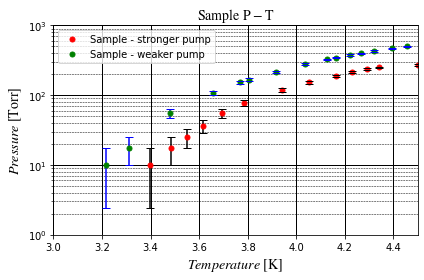

In [235]:
fig, axis = plt.subplots()

# axis.plot(PT[:, 3],PT[:, 2], '.', ms = 15, color = 'b', label = '1K without thermal shutter')
axis.plot(PT_cap[:, 3], PT_cap[:, 1], '.', ms = 10, color = 'r', label = 'Sample - stronger pump')
# axis.plot(PT_cap[:, 3], PT_cap[:, 2], '.', ms = 15,color = 'black', label = 'Sample with thermal shutter')
axis.plot(PT_weak[:, 3], PT_weak[:, 1], '.', ms = 10, c= 'g', label = 'Sample - weaker pump')

axis.errorbar(PT_weak[:, 3], PT_weak[:, 1], yerr = 7.5, fmt = ' ', ecolor = 'b', capsize = 4)
axis.errorbar(PT_cap[:, 3], PT_cap[:, 1], yerr = 7.5, fmt = ' ', ecolor = 'black', capsize = 4)


axis.legend()
axis.set_xlabel(r'$Temperature\ \mathrm{[K]}$', fontsize = 14)
axis.set_ylabel(r'$Pressure\ \mathrm{[Torr]}$', fontsize = 14)
axis.set_title(r'$\mathrm{Sample\ P-T}$', fontsize = 14)

axis.set_xlim(3.0, 4.5)
axis.set_ylim(1, 1e3)
axis.set_yscale('log')
axis.grid(which = 'major', axis = 'both', ls = '-', lw = 1, c = 'black')
axis.grid(which = 'minor', axis = 'y', ls = '--', lw = 0.5, c = 'black')

fig.tight_layout();
# fig.savefig('/Users/hunfen/OneDrive/General Files/ゼミー/20210422/Helium_PTcurve/he_PT_sample.png', dpi = 600)

In [6]:
a = np.zeros(3) 
b = np.zeros(3)
for i in range(len(a)):
    a[i] = 120 * i + 34
    b[i] = 120 * i - 56

In [5]:
a

array([ 34., 154., 274.])

In [7]:
b

array([-56.,  64., 184.])

In [8]:
map_pos((24.3, 18.3))

1540

In [158]:
f_7T = nano.read_file('/Users/hunfen/OneDrive/General Files/ゼミー/20210401/2021-03-15/Grid Spectroscopy017.3ds')
f_Se_0T = nano.read_file('/Users/hunfen/OneDrive/General Files/ゼミー/20210401/2021-03-15/Grid Spectroscopy008.3ds')
f_Se_1_0T = nano.read_file('/Users/hunfen/OneDrive/General Files/ゼミー/20210401/2021-03-15/Grid Spectroscopy012.3ds')

In [38]:
f.Parameters[2262]

array([ 5.00000007e-02, -3.40000018e-02, -2.68832082e-07, -1.77319748e-07,
       -8.97404817e-08,  0.00000000e+00,  2.00000009e-03,  1.99999996e-02,
        1.00000000e+00,             nan,  1.03568223e-10, -8.97406380e-08])

In [162]:
map_pos((7.5, 27.3))

2262

In [98]:
bias = np.linspace(50, -36, 401)
bias_x2 = np.append(bias, bias)

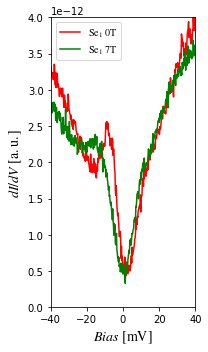

In [164]:
fig, axis = plt.subplots(figsize = (3, 5))

spec_0T = (f_Se_0T.data[6][1] + f_Se_0T.data[6][4]) / 2

spec_7T = (f_7T.data[2262][1] + f_7T.data[2262][4]) / 2

axis.plot(bias - 8, spec_0T, '-', ms = 5,c = 'r', label = r'$\mathrm{Se_1\ 0T}$')
# axis.plot(bias_7 - 8, (f_7T.data[2417][1] + f_7T.data[2417][4]) / 2, color = 'r')
axis.plot(bias - 8, spec_7T, '-', ms = 5, c = 'g', label = r'$\mathrm{Se_1\ 7T}$')

# axis.axvline(x = -11, ls = '--', c = 'black')
axis.legend()

axis.set_xlabel(r'$Bias\ \mathrm{[mV]}$', fontsize = 14)
axis.set_ylabel(r'$dI/dV\ \mathrm{[a.u.]}$', fontsize = 14)
axis.set_xlim(-40, 40)
axis.set_ylim(0, 4e-12)
fig.tight_layout();

# fig.savefig('/Users/hunfen/OneDrive/General Files/ゼミー/20210422/Se vacancy/No1_0T&7T.png.png', dpi = 600)